<a href="https://colab.research.google.com/github/Sristi2208/Customer-Churn-rate-prediction/blob/main/Customer_Churn_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

## Part 1: Data Preprocessing

In [52]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [53]:
# reading the dataset
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Exploration

In [54]:
dataset.shape

(10000, 14)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [56]:
dataset.select_dtypes(include="object").columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [57]:
len(dataset.select_dtypes(include="object").columns)

3

In [58]:
len(dataset.select_dtypes(include=["float64","int64"]).columns)

11

In [59]:
#statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing values


In [60]:
dataset.isnull().values.any()

False

In [61]:
dataset.isnull().values.sum()

0

## Dealing with categorical data

In [62]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [63]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
dataset=dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [65]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [67]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [68]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [69]:
dataset.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [70]:
dataset.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [71]:
# one hot encoding
dataset=pd.get_dummies(data=dataset,drop_first=True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


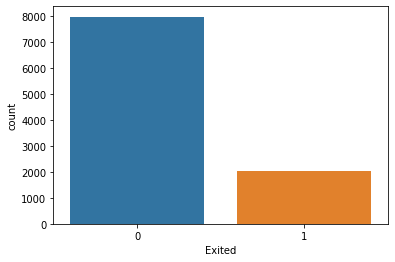

In [72]:
sns.countplot(dataset['Exited'],label='count')
plt.show()

In [73]:
# Staying with the bank
(dataset.Exited==0).sum()

7963

In [74]:
# Exited bank
(dataset.Exited==1).sum()

2037

## Correlation matrix and heatmap


In [75]:
dataset_2=dataset.drop(columns="Exited")
dataset_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


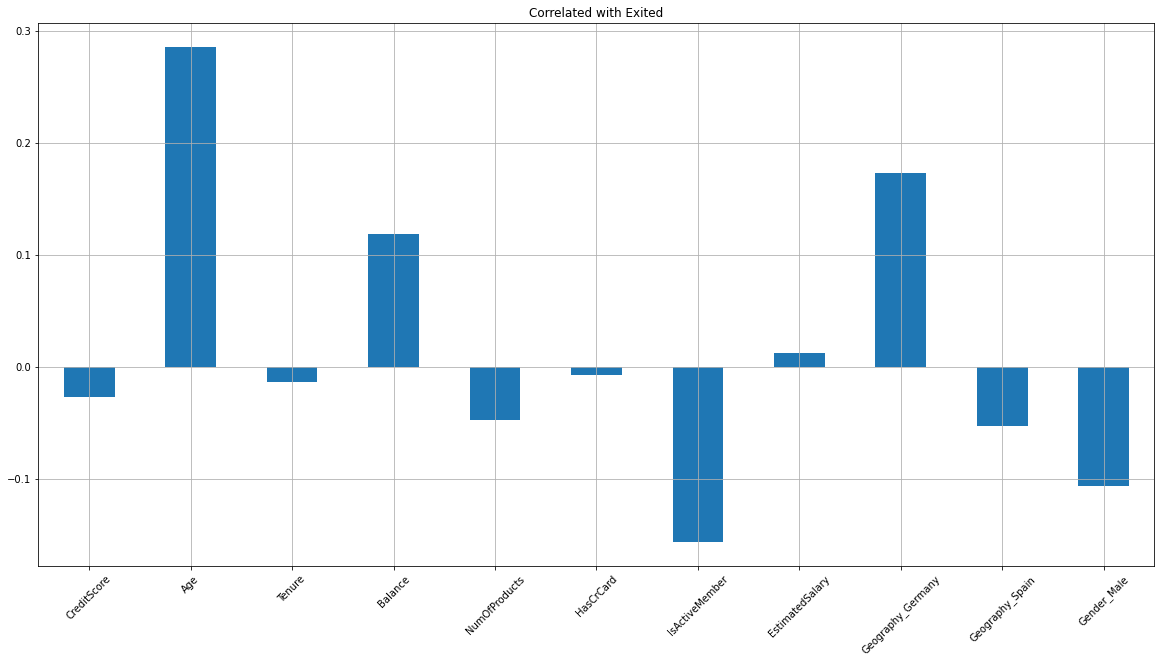

In [76]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(20,10),title="Correlated with Exited", rot=45, grid=True)

In [77]:
#correlation matrix
corr=dataset.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


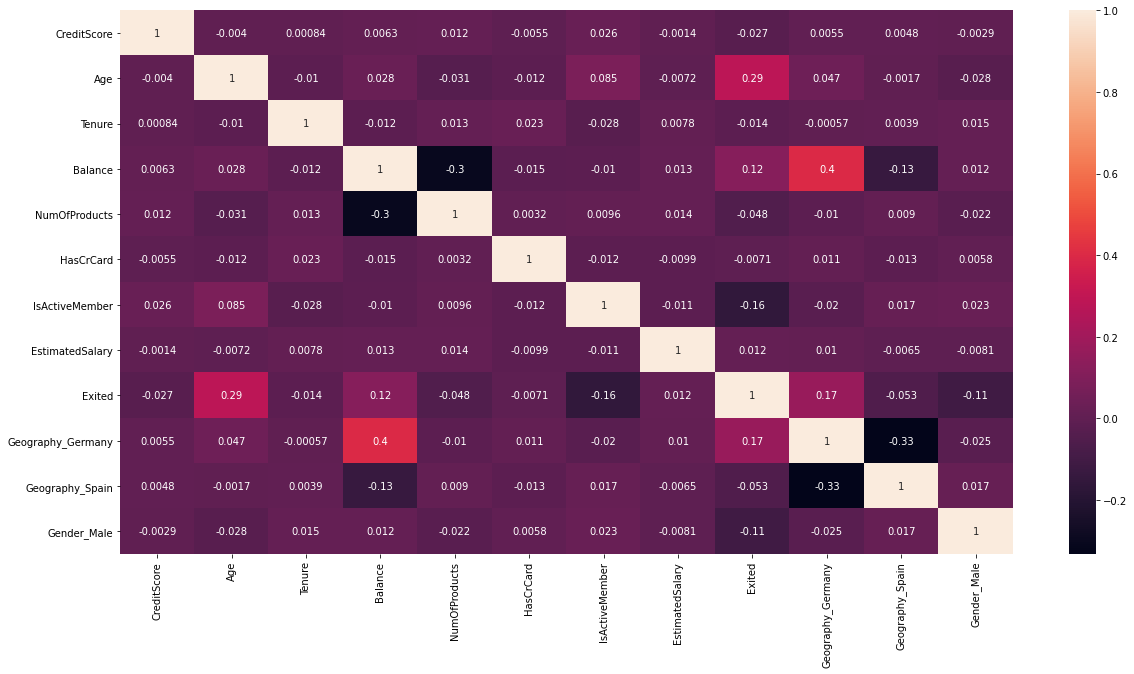

In [78]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [79]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [80]:
# matrix of features
x = dataset.drop(columns='Exited')

In [81]:
# target variable
y=dataset['Exited']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(2000,)

## Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

## Part 2 - Building the model

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score



## 1) Logistic Regression

In [87]:
classifir_lr = LogisticRegression(random_state=0)
classifir_lr.fit(x_train,y_train)
y_pred = classifir_lr.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 309,   96]])

## Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
accuracies = cross_val_score(classifir_lr, X=x_train, y=y_train, cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.84 %
Standard deviation is 0.88 %


## 2) Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score



In [99]:
classifir_rm = RandomForestClassifier(random_state=0)
classifir_rm.fit(x_train,y_train)
y_pred = classifir_rm.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_result = pd.DataFrame([['Random Forest', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
results=results.append(model_result, ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988
2,Random Forest,0.867,0.613372,0.745583,0.520988


In [100]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   72],
       [ 194,  211]])

## Cross Validation

In [101]:
# Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifir_rm, X=x_train, y=y_train, cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accuracies.std()*100))


Accuracy is 85.96 %
Standard deviation is 1.02 %


## XGBoost

In [102]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score



In [96]:
classifir_xgb = XGBClassifier()
classifir_xgb.fit(x_train,y_train)
y_pred = classifir_xgb.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_results = pd.DataFrame([['XGBoost', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [103]:
results=results.append(model_results, ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,Random Forest,0.8670,0.613372,0.745583,0.520988
3,XGBoost,0.8645,0.605531,0.737589,0.513580


In [104]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   72],
       [ 194,  211]])

## Cross Validation

In [105]:
# Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifir_xgb, X=x_train, y=y_train, cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accuracies.std()*100))


Accuracy is 86.25 %
Standard deviation is 1.02 %


## Randomized search to find the best parameter(XGBoost Classifier)

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
parameters = {
    'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [109]:
random_search = RandomizedSearchCV(estimator=classifir_xgb, param_distributions=parameters, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [110]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [111]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [112]:
random_search.best_score_

0.8626877274174616

In [113]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 3}

## Part 4- Final Model (XGBoost Classifier)

In [114]:
from xgboost import XGBClassifier


In [115]:
classifir = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
classifir.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [116]:
y_pred = classifir.predict(x_test)

In [117]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_resultss = pd.DataFrame([['Final XGBoost', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
results=results.append(model_resultss, ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,Random Forest,0.8670,0.613372,0.745583,0.520988
3,XGBoost,0.8645,0.605531,0.737589,0.513580
4,Final XGBoost,0.8695,0.620087,0.755319,0.525926


## Cross Validation

In [118]:
# Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifir, X=x_train, y=y_train, cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accuracies.std()*100))


Accuracy is 86.41 %
Standard deviation is 0.85 %


## Predicting the single observation

In [119]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [120]:
single_obs=[[625,45,5,12500.01,1,0,1,101348.88,0,0,1]]

In [121]:
classifir.predict(sc.transform(single_obs))

array([0])